In [1]:
# import the packages needed 
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
#we need a lot of functions from different 数据包,therefore, we still need to load sklearn and statsmodels
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#底下的两个function can help you get the matrix
# define a function for calculating the metric to be used later 
def classification_metrics(Y_pred, Y_true):
    acc = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1score = f1_score(Y_true, Y_pred)

    return acc, precision, recall, f1score

# define a function for printing the metrics 
def display_metrics(classifierName,Y_pred,Y_true):
    print ("______________________________________________")
    print ("Model: "+classifierName)
    acc, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
    print ("Accuracy: "+str(acc))
    print ("Precision: "+str(precision))
    print ("Recall: "+str(recall))
    print ("F1-score: "+str(f1score))
    print ("______________________________________________")
    print ("")

In [2]:
data = pd.read_csv('DSI_kickstarterscrape_dataset_cleaned (4).csv', engine='python')
data

,Unnamed: 0,project_id,name,url,category,subcategory,location,status,goal,pledged,...,Average,Std,CV,weekday,date,month,year,FAQ,video,length(s)
0,0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545,...,632.14,826.21,1.31,Fri,19,Aug,2011,0,1,113
1,1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20,...,18.20,17.86,0.98,Mon,2,Aug,2010,0,0,0
2,2,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535,...,556.62,1310.43,2.35,Sun,8,Apr,2012,2,1,201
3,3,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0,...,97.50,82.85,0.85,Wed,1,Jun,2011,0,1,312
4,4,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582,...,275.71,336.69,1.22,Wed,22,Jun,2011,0,1,164
5,5,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Film & Video,Short Film,"Collegedale, TN",failed,1000.0,280,...,38.00,34.73,0.91,Sat,18,Feb,2012,0,1,91
6,6,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,Fashion,"Chicago, IL",successful,2000.0,2180,...,275.71,336.66,1.22,Fri,30,Dec,2011,0,0,0
7,7,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,"Chicago, IL",successful,1000.0,1125,...,175.67,284.43,1.62,Sun,18,Apr,2010,0,1,211
8,8,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,Art,Illustration,"Chicago, IL",successful,7500.0,9836,...,337.60,488.89,1.45,Tue,1,Nov,2011,0,1,93
9,10,735377,The Janks music video series,http://www.kickstarter.com/projects/thejanks/t...,Music,Indie Rock,"Ashland, OR",successful,20000.0,20138,...,1211.81,2285.66,1.89,Fri,10,Dec,2010,0,1,60


In [3]:
data2 = data

data2 = pd.concat([data2,pd.get_dummies(data2['status'], prefix='status')],axis=1)

data2.drop(['status'],axis=1, inplace=True)

In [4]:
data2

,Unnamed: 0,project_id,name,url,category,subcategory,location,goal,pledged,funded_percentage,...,CV,weekday,date,month,year,FAQ,video,length(s),status_failed,status_successful
0,0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",10500.0,11545,1.099524,...,1.31,Fri,19,Aug,2011,0,1,113,0,1
1,1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",4000.0,20,0.005000,...,0.98,Mon,2,Aug,2010,0,0,0,1,0
2,2,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",6000.0,6535,1.089167,...,2.35,Sun,8,Apr,2012,2,1,201,0,1
3,3,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",3500.0,0,0.000000,...,0.85,Wed,1,Jun,2011,0,1,312,1,0
4,4,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",3500.0,3582,1.023331,...,1.22,Wed,22,Jun,2011,0,1,164,0,1
5,5,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Film & Video,Short Film,"Collegedale, TN",1000.0,280,0.280000,...,0.91,Sat,18,Feb,2012,0,1,91,1,0
6,6,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,Fashion,"Chicago, IL",2000.0,2180,1.090000,...,1.22,Fri,30,Dec,2011,0,0,0,0,1
7,7,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,"Chicago, IL",1000.0,1125,1.125000,...,1.62,Sun,18,Apr,2010,0,1,211,0,1
8,8,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,Art,Illustration,"Chicago, IL",7500.0,9836,1.311527,...,1.45,Tue,1,Nov,2011,0,1,93,0,1
9,10,735377,The Janks music video series,http://www.kickstarter.com/projects/thejanks/t...,Music,Indie Rock,"Ashland, OR",20000.0,20138,1.006911,...,1.89,Fri,10,Dec,2010,0,1,60,0,1


In [5]:
from matplotlib import pyplot as plt

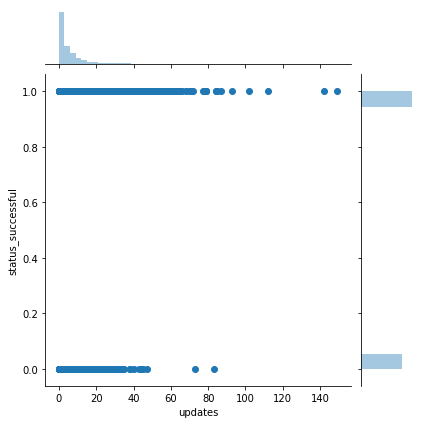

In [6]:
sns_plot = sns.jointplot(x='updates',y='status_successful',data=data2,kind='scatter')
sns_plot.savefig("updates.png")

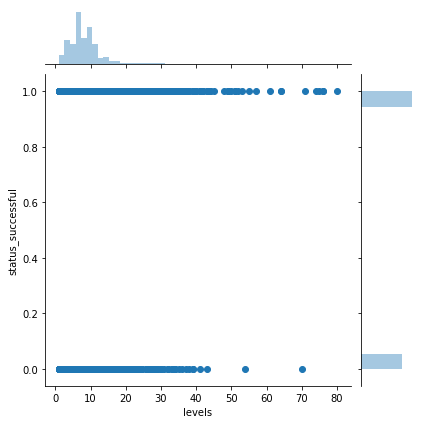

In [7]:
sns_plot1 = sns.jointplot(x='levels',y='status_successful',data=data2,kind='scatter')
sns_plot1.savefig("levels.png")

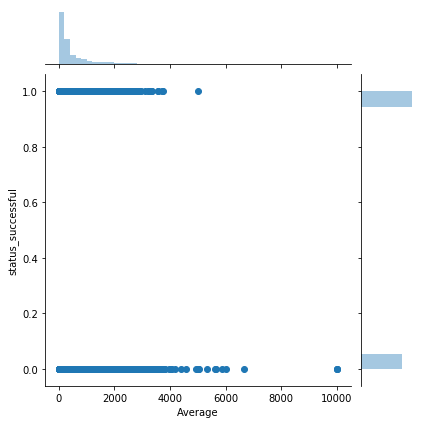

In [8]:
sns_plot2 = sns.jointplot(x='Average',y='status_successful',data=data2,kind='scatter')
sns_plot2.savefig("average.png")

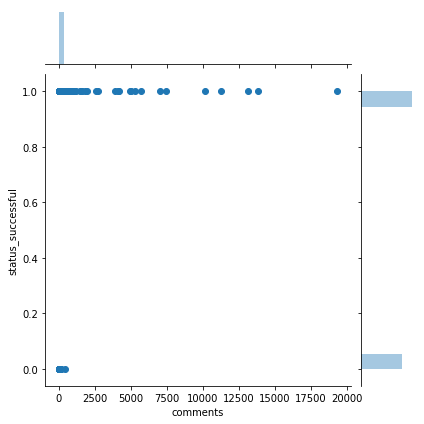

In [9]:
sns_plot3 = sns.jointplot(x='comments',y='status_successful',data=data2,kind='scatter')
sns_plot3.savefig("comments.png")

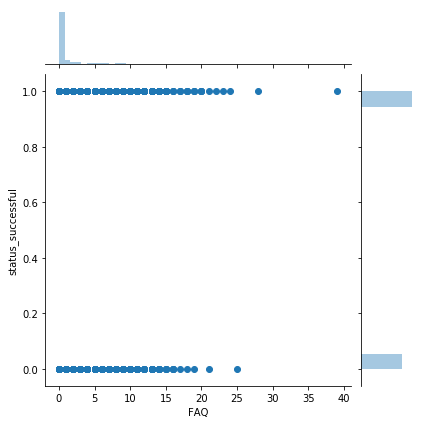

In [10]:
sns.jointplot(x='FAQ',y='status_successful',data=data2,kind='scatter')

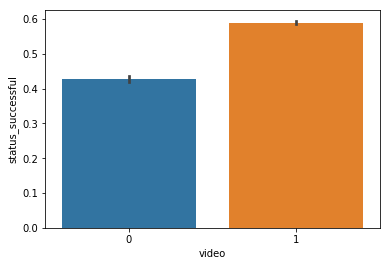

In [11]:
sns.barplot(x='video',y='status_successful',data=data2)

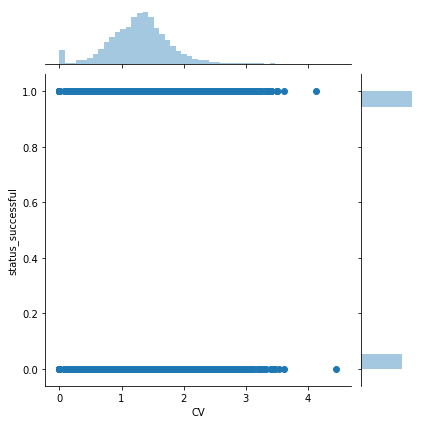

In [13]:
sns.jointplot(x='CV',y='status_successful',data=data2,kind='scatter')

In [14]:
data2.dropna(axis=0, how='any', inplace=True)

In [15]:
data2

,Unnamed: 0,project_id,name,url,category,subcategory,location,goal,pledged,funded_percentage,...,CV,weekday,date,month,year,FAQ,video,length(s),status_failed,status_successful
0,0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",10500.0,11545,1.099524,...,1.31,Fri,19,Aug,2011,0,1,113,0,1
1,1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",4000.0,20,0.005000,...,0.98,Mon,2,Aug,2010,0,0,0,1,0
2,2,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",6000.0,6535,1.089167,...,2.35,Sun,8,Apr,2012,2,1,201,0,1
3,3,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",3500.0,0,0.000000,...,0.85,Wed,1,Jun,2011,0,1,312,1,0
4,4,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",3500.0,3582,1.023331,...,1.22,Wed,22,Jun,2011,0,1,164,0,1
5,5,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Film & Video,Short Film,"Collegedale, TN",1000.0,280,0.280000,...,0.91,Sat,18,Feb,2012,0,1,91,1,0
6,6,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,Fashion,"Chicago, IL",2000.0,2180,1.090000,...,1.22,Fri,30,Dec,2011,0,0,0,0,1
7,7,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,"Chicago, IL",1000.0,1125,1.125000,...,1.62,Sun,18,Apr,2010,0,1,211,0,1
8,8,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,Art,Illustration,"Chicago, IL",7500.0,9836,1.311527,...,1.45,Tue,1,Nov,2011,0,1,93,0,1
9,10,735377,The Janks music video series,http://www.kickstarter.com/projects/thejanks/t...,Music,Indie Rock,"Ashland, OR",20000.0,20138,1.006911,...,1.89,Fri,10,Dec,2010,0,1,60,0,1


In [16]:
# TRIAL 1
predictors1 = ['updates']+['levels']+['Average']+['comments']+['FAQ']
X = data2[predictors1]
y = data2['status_successful']
print('X variables:\n',[i for i in X.columns])

X variables:
 ['updates', 'levels', 'Average', 'comments', 'FAQ']


In [17]:
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit             Pseudo R-squared: inf   
Dependent Variable: status_successful AIC:              inf   
Date:               2018-12-03 02:38  BIC:              inf   
No. Observations:   28387             Log-Likelihood:   -inf  
Df Model:           4                 LL-Null:          0.0000
Df Residuals:       28382             LLR p-value:      1.0000
Converged:          1.0000            Scale:            1.0000
No. Iterations:     10.0000                                   
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
updates    0.2667    0.0054   49.2057  0.0000   0.2561   0.2773
levels    -0.0460    0.0027  -17.1963  0.0000  -0.0512  -0.0408
Average   -0.0011    0.0000  -28.7289  0.0000  -0.0011  -0.0010
comments   0.1393    0.0053   26.1077  0.0000   0.1288   0.1497
FAQ       -0.1353    0.0112  -12.0566  0.0000  -0.1572  -0.1133
==============================================================

"""

In [18]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Predict the y values for the test set
y_pred = model.predict(X_test)

In [20]:
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4504  923]
 [1853 4886]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.771823113595
Precision: 0.841108624548
Recall: 0.725033387743
F1-score: 0.778769525024
______________________________________________



In [21]:
#TRIAL 2
#predictors2 another combination
predictors2 = ['updates']+['levels']+['Average']+['comments']+['FAQ']+['video']
X = data2[predictors2]
y = data2['status_successful']
print('X variables:\n',[i for i in X.columns])

X variables:
 ['updates', 'levels', 'Average', 'comments', 'FAQ', 'video']


In [22]:
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit             Pseudo R-squared: inf   
Dependent Variable: status_successful AIC:              inf   
Date:               2018-12-03 02:38  BIC:              inf   
No. Observations:   28387             Log-Likelihood:   -inf  
Df Model:           5                 LL-Null:          0.0000
Df Residuals:       28381             LLR p-value:      1.0000
Converged:          1.0000            Scale:            1.0000
No. Iterations:     10.0000                                   
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
updates    0.2683    0.0055   49.1033  0.0000   0.2576   0.2790
levels    -0.0410    0.0033  -12.2710  0.0000  -0.0476  -0.0345
Average   -0.0011    0.0000  -28.5342  0.0000  -0.0011  -0.0010
comments   0.1398    0.0053   26.1423  0.0000   0.1293   0.1503
FAQ       -0.1344    0.0112  -11.9628  0.0000  -0.1564  -0.1124
video     -0.0703    0.0284   -2.4782  0.0132  -0.1259  -0.0147
==============================================================

"""

In [23]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Predict the y values for the test set
y_pred = model.predict(X_test)

# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4494  933]
 [1824 4915]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.773384843005
Precision: 0.840458276334
Recall: 0.729336696839
F1-score: 0.780964487169
______________________________________________



In [25]:
#TRIAL 3
# Replicate original data so not to overwrite it 
data3 = data2

# create dummy variables for each country 
data3 = pd.concat([data3,pd.get_dummies(data3['category'], prefix='category')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
data3.drop(['category'],axis=1, inplace=True)

In [26]:
data3

,Unnamed: 0,project_id,name,url,subcategory,location,goal,pledged,funded_percentage,backers,...,category_Design,category_Fashion,category_Film & Video,category_Food,category_Games,category_Music,category_Photography,category_Publishing,category_Technology,category_Theater
0,0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Short Film,"Columbia, MO",10500.0,11545,1.099524,66,...,0,0,1,0,0,0,0,0,0,0
1,1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Board & Card Games,"Maplewood, NJ",4000.0,20,0.005000,2,...,0,0,0,0,1,0,0,0,0,0
2,2,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Documentary,"Los Angeles, CA",6000.0,6535,1.089167,100,...,0,0,1,0,0,0,0,0,0,0
3,3,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,"Novi, MI",3500.0,0,0.000000,0,...,0,1,0,0,0,0,0,0,0,0
4,4,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Short Film,"Portland, OR",3500.0,3582,1.023331,39,...,0,0,1,0,0,0,0,0,0,0
5,5,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Short Film,"Collegedale, TN",1000.0,280,0.280000,8,...,0,0,1,0,0,0,0,0,0,0
6,6,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,"Chicago, IL",2000.0,2180,1.090000,46,...,0,1,0,0,0,0,0,0,0,0
7,7,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,"Chicago, IL",1000.0,1125,1.125000,30,...,0,0,0,0,0,1,0,0,0,0
8,8,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,Illustration,"Chicago, IL",7500.0,9836,1.311527,255,...,0,0,0,0,0,0,0,0,0,0
9,10,735377,The Janks music video series,http://www.kickstarter.com/projects/thejanks/t...,Indie Rock,"Ashland, OR",20000.0,20138,1.006911,115,...,0,0,0,0,0,1,0,0,0,0


In [27]:
predictors3 = ['updates']+['levels']+['Average']+['comments']+['FAQ']+['video']+[i for i in data3.columns if i.startswith('category')][1:]

In [28]:
# create dataframes for X (using Age only) and y variables 
X = data3[predictors3]
y = data3['status_successful']

# see list of X variables
print('X variables:\n',[i for i in X.columns])

X variables:
 ['updates', 'levels', 'Average', 'comments', 'FAQ', 'video', 'category_Comics', 'category_Dance', 'category_Design', 'category_Fashion', 'category_Film & Video', 'category_Food', 'category_Games', 'category_Music', 'category_Photography', 'category_Publishing', 'category_Technology', 'category_Theater']


In [29]:
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                  Logit               Pseudo R-squared:   inf   
Dependent Variable:     status_successful   AIC:                inf   
Date:                   2018-12-03 02:38    BIC:                inf   
No. Observations:       28387               Log-Likelihood:     -inf  
Df Model:               17                  LL-Null:            0.0000
Df Residuals:           28369               LLR p-value:        1.0000
Converged:              1.0000              Scale:              1.0000
No. Iterations:         10.0000                                       
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
updates                0.2928   0.0058  50.6326 0.0000  0.2815  0.3042
levels                -0.0073   0.0041  -1.7792 0.0752 -0.0154  0.0007
Average               -0.0011   0.0000 -27.6236 0.0000 -0.0012 -0.0010
comments               0.1619   0.0057  28.3777 0.0000  0.1507  0.1731
FAQ                   -0.0958   0.0118  -8.1335 0.0000 -0.1189 -0.0727
video                  0.1449   0.0330   4.3972 0.0000  0.0803  0.2095
category_Comics       -1.5440   0.1116 -13.8356 0.0000 -1.7627 -1.3253
category_Dance         0.5803   0.1163   4.9898 0.0000  0.3524  0.8083
category_Design       -1.9538   0.0938 -20.8265 0.0000 -2.1377 -1.7699
category_Fashion      -1.5606   0.1027 -15.1888 0.0000 -1.7620 -1.3592
category_Film & Video -0.6385   0.0401 -15.9068 0.0000 -0.7171 -0.5598
category_Food         -1.1733   0.0908 -12.9250 0.0000 -1.3512 -0.9953
category_Games        -2.8867   0.1224 -23.5847 0.0000 -3.1266 -2.6468
category_Music        -0.0319   0.0424  -0.7505 0.4530 -0.1150  0.0513
category_Photography  -1.1188   0.0853 -13.1096 0.0000 -1.2861 -0.9515
category_Publishing   -1.3454   0.0548 -24.5656 0.0000 -1.4528 -1.2381
category_Technology   -2.3196   0.1509 -15.3762 0.0000 -2.6153 -2.0239
category_Theater       0.4328   0.0662   6.5400 0.0000  0.3031  0.5625
======================================================================

"""

In [30]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Predict the y values for the test set
y_pred = model.predict(X_test)

# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4352 1075]
 [1466 5273]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.791139240506
Precision: 0.830655324512
Recall: 0.782460305683
F1-score: 0.805837854359
______________________________________________



In [32]:
#Trial 4
predictors4 = ['updates']+['levels']+['Average']+['comments']+['FAQ']+['video']+['duration']+[i for i in data3.columns if i.startswith('category')][1:]
# create dataframes for X (using Age only) and y variables 
X = data3[predictors4]
y = data3['status_successful']

# see list of X variables
print('X variables:\n',[i for i in X.columns])

X variables:
 ['updates', 'levels', 'Average', 'comments', 'FAQ', 'video', 'duration', 'category_Comics', 'category_Dance', 'category_Design', 'category_Fashion', 'category_Film & Video', 'category_Food', 'category_Games', 'category_Music', 'category_Photography', 'category_Publishing', 'category_Technology', 'category_Theater']


In [33]:
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                  Logit               Pseudo R-squared:   inf   
Dependent Variable:     status_successful   AIC:                inf   
Date:                   2018-12-03 02:38    BIC:                inf   
No. Observations:       28387               Log-Likelihood:     -inf  
Df Model:               18                  LL-Null:            0.0000
Df Residuals:           28368               LLR p-value:        1.0000
Converged:              1.0000              Scale:              1.0000
No. Iterations:         10.0000                                       
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
updates                0.3030   0.0059  51.6574 0.0000  0.2915  0.3145
levels                 0.0177   0.0044   4.0376 0.0001  0.0091  0.0262
Average               -0.0011   0.0000 -25.8783 0.0000 -0.0011 -0.0010
comments               0.1631   0.0058  28.1938 0.0000  0.1517  0.1744
FAQ                   -0.1066   0.0120  -8.8862 0.0000 -0.1301 -0.0831
video                  0.2753   0.0340   8.1007 0.0000  0.2087  0.3419
duration              -0.0231   0.0008 -28.5953 0.0000 -0.0247 -0.0215
category_Comics       -0.9248   0.1154  -8.0150 0.0000 -1.1509 -0.6986
category_Dance         1.1907   0.1207   9.8688 0.0000  0.9542  1.4272
category_Design       -1.4207   0.0968 -14.6715 0.0000 -1.6105 -1.2309
category_Fashion      -1.0263   0.1058  -9.7023 0.0000 -1.2337 -0.8190
category_Film & Video -0.0594   0.0453  -1.3110 0.1899 -0.1481  0.0294
category_Food         -0.6294   0.0946  -6.6511 0.0000 -0.8149 -0.4439
category_Games        -2.3743   0.1258 -18.8681 0.0000 -2.6209 -2.1276
category_Music         0.5622   0.0478  11.7616 0.0000  0.4685  0.6558
category_Photography  -0.5202   0.0893  -5.8232 0.0000 -0.6953 -0.3451
category_Publishing   -0.7489   0.0592 -12.6504 0.0000 -0.8649 -0.6329
category_Technology   -1.7596   0.1548 -11.3639 0.0000 -2.0630 -1.4561
category_Theater       1.0285   0.0706  14.5594 0.0000  0.8900  1.1669
======================================================================

"""

In [34]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# Predict the y values for the test set
y_pred = model.predict(X_test)

# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4296 1131]
 [1359 5380]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.795331251027
Precision: 0.826293964061
Recall: 0.798338032349
F1-score: 0.812075471698
______________________________________________



In [36]:
data4 = data3

data4 = pd.concat([data4,pd.get_dummies(data4['date'], prefix='date')],axis=1)

data4.drop(['date'],axis=1,inplace=True)

In [37]:
data5 = data4

data5 = pd.concat([data5,pd.get_dummies(data5['month'], prefix='month')],axis=1)

data5.drop(['month'],axis=1,inplace=True)

In [38]:
data6 = data5

# create dummy variables for each country 
data6 = pd.concat([data6,pd.get_dummies(data6['weekday'], prefix='weekday')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
data6.drop(['weekday'],axis=1,inplace=True)

In [39]:
predictors5 = ['goal']+['updates']+['levels']+['Average']+['comments']+['FAQ']+['video']+['duration']+[i for i in data6.columns if i.startswith('category')][1:]+[i for i in data6.columns if i.startswith('date')][1:]+[i for i in data6.columns if i.startswith('weekday')][1:]+[i for i in data6.columns if i.startswith('month')][1:]
X = data6[predictors5]
y = data6['status_successful']
print('X variables:\n',[i for i in X.columns])
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

X variables:
 ['goal', 'updates', 'levels', 'Average', 'comments', 'FAQ', 'video', 'duration', 'category_Comics', 'category_Dance', 'category_Design', 'category_Fashion', 'category_Film & Video', 'category_Food', 'category_Games', 'category_Music', 'category_Photography', 'category_Publishing', 'category_Technology', 'category_Theater', 'date_2', 'date_3', 'date_4', 'date_5', 'date_6', 'date_7', 'date_8', 'date_9', 'date_10', 'date_11', 'date_12', 'date_13', 'date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19', 'date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25', 'date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                  Logit               Pseudo R-squared:   inf   
Dependent Variable:     status_successful   AIC:                inf   
Date:                   2018-12-03 02:39    BIC:                inf   
No. Observations:       28387               Log-Likelihood:     -inf  
Df Model:               66                  LL-Null:            0.0000
Df Residuals:           28320               LLR p-value:        1.0000
Converged:              1.0000              Scale:              1.0000
No. Iterations:         11.0000                                       
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
goal                  -0.0002   0.0000 -43.4411 0.0000 -0.0002 -0.0002
updates                0.3329   0.0066  50.7585 0.0000  0.3200  0.3457
levels                 0.0330   0.0049   6.6627 0.0000  0.0233  0.0427
Average                0.0001   0.0000   2.9860 0.0028  0.0000  0.0002
comments               0.2561   0.0071  36.2692 0.0000  0.2423  0.2700
FAQ                   -0.0634   0.0134  -4.7504 0.0000 -0.0896 -0.0373
video                  0.3436   0.0373   9.2037 0.0000  0.2705  0.4168
duration              -0.0180   0.0009 -19.1931 0.0000 -0.0199 -0.0162
category_Comics       -0.9931   0.1287  -7.7196 0.0000 -1.2453 -0.7410
category_Dance         1.1612   0.1277   9.0928 0.0000  0.9109  1.4114
category_Design       -1.0361   0.1108  -9.3543 0.0000 -1.2532 -0.8190
category_Fashion      -0.9561   0.1160  -8.2414 0.0000 -1.1835 -0.7287
category_Film & Video  0.1948   0.0553   3.5238 0.0004  0.0865  0.3032
category_Food         -0.1874   0.1105  -1.6964 0.0898 -0.4038  0.0291
category_Games        -2.3032   0.1450 -15.8814 0.0000 -2.5874 -2.0189
category_Music         0.4935   0.0567   8.7040 0.0000  0.3823  0.6046
category_Photography  -0.4808   0.0991  -4.8510 0.0000 -0.6751 -0.2866
category_Publishing   -0.6223   0.0693  -8.9788 0.0000 -0.7582 -0.4865
category_Technology   -1.3314   0.1833  -7.2630 0.0000 -1.6906 -0.9721
category_Theater       1.1347   0.0803  14.1362 0.0000  0.9774  1.2920
date_2                -0.0056   0.0927  -0.0604 0.9518 -0.1873  0.1761
date_3                 0.0428   0.1054   0.4066 0.6843 -0.1637  0.2494
date_4                -0.1318   0.1056  -1.2487 0.2118 -0.3388  0.0751
date_5                 0.0161   0.1024   0.1576 0.8748 -0.1846  0.2168
date_6                -0.1003   0.1068  -0.9393 0.3476 -0.3095  0.1090
date_7                -0.1200   0.1050  -1.1432 0.2530 -0.3258  0.0858
date_8                -0.1290   0.1100  -1.1727 0.2409 -0.3446  0.0866
date_9                -0.0189   0.1106  -0.1710 0.8642 -0.2356  0.1978
date_10               -0.0878   0.1040  -0.8440 0.3987 -0.2916  0.1160
date_11               -0.0389   0.1066  -0.3649 0.7152 -0.2478  0.1700
date_12                0.1483   0.1075   1.3794 0.1678 -0.0624  0.3591
date_13                0.0580   0.1100   0.5272 0.5981 -0.1576  0.2735
date_14               -0.1535   0.1072  -1.4314 0.1523 -0.3636  0.0567
date_15               -0.0229   0.0976  -0.2351 0.8142 -0.2142  0.1683
date_16               -0.1220   0.0974  -1.2527 0.2103 -0.3129  0.0689
date_17               -0.0308   0.1074  -0.2869 0.7742 -0.2414  0.1798
date_18               -0.1670   0.1040  -1.6052 0.1084 -0.3709  0.0369
date_19                0.0119   0.1068   0.1113 0.9113 -0.1974  0.2212
date_20               -0.1154   0.1041  -1.1083 0.2677 -0.3195  0.0887
date_21               -0.1119   0.1037  -1.0786 0.2807 -0.3151  0.0914
date_22               -0.1568   0.1061  -1.4780 0.1394 -0.3648  0.0511
date_23               -0.0129   0.1059  -0.1214 0.9034 -0.2205  0.1947
date_24               -0.0954   0.1092  -0.8741 0.3821 -0.3094  0.1186
dat

In [40]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4412 1015]
 [1213 5526]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.816866677626
Precision: 0.844824950313
Recall: 0.820002967799
F1-score: 0.832228915663
______________________________________________



In [41]:
predictors6 = ['goal']+['updates']+['levels']+['Average']+['comments']+['FAQ']+['video']+['duration']+[i for i in data6.columns if i.startswith('category')][1:]
X = data6[predictors6]
y = data6['status_successful']
print('X variables:\n',[i for i in X.columns])
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

X variables:
 ['goal', 'updates', 'levels', 'Average', 'comments', 'FAQ', 'video', 'duration', 'category_Comics', 'category_Dance', 'category_Design', 'category_Fashion', 'category_Film & Video', 'category_Food', 'category_Games', 'category_Music', 'category_Photography', 'category_Publishing', 'category_Technology', 'category_Theater']


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                  Logit               Pseudo R-squared:   inf   
Dependent Variable:     status_successful   AIC:                inf   
Date:                   2018-12-03 02:39    BIC:                inf   
No. Observations:       28387               Log-Likelihood:     -inf  
Df Model:               19                  LL-Null:            0.0000
Df Residuals:           28367               LLR p-value:        1.0000
Converged:              1.0000              Scale:              1.0000
No. Iterations:         11.0000                                       
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
goal                  -0.0002   0.0000 -43.4106 0.0000 -0.0002 -0.0002
updates                0.3312   0.0065  50.6957 0.0000  0.3184  0.3440
levels                 0.0303   0.0048   6.3773 0.0000  0.0210  0.0396
Average                0.0001   0.0000   2.9235 0.0035  0.0000  0.0002
comments               0.2575   0.0070  36.5321 0.0000  0.2437  0.2713
FAQ                   -0.0707   0.0132  -5.3444 0.0000 -0.0966 -0.0447
video                  0.3275   0.0362   9.0480 0.0000  0.2565  0.3984
duration              -0.0191   0.0009 -22.1203 0.0000 -0.0207 -0.0174
category_Comics       -1.0558   0.1259  -8.3884 0.0000 -1.3025 -0.8091
category_Dance         1.0938   0.1247   8.7719 0.0000  0.8494  1.3382
category_Design       -1.0875   0.1064 -10.2238 0.0000 -1.2960 -0.8790
category_Fashion      -1.0065   0.1125  -8.9466 0.0000 -1.2270 -0.7860
category_Film & Video  0.1308   0.0485   2.6968 0.0070  0.0357  0.2259
category_Food         -0.2396   0.1072  -2.2360 0.0253 -0.4496 -0.0296
category_Games        -2.3592   0.1424 -16.5628 0.0000 -2.6384 -2.0800
category_Music         0.4392   0.0508   8.6518 0.0000  0.3397  0.5387
category_Photography  -0.5452   0.0953  -5.7198 0.0000 -0.7320 -0.3584
category_Publishing   -0.6795   0.0634 -10.7156 0.0000 -0.8038 -0.5552
category_Technology   -1.3844   0.1803  -7.6764 0.0000 -1.7378 -1.0309
category_Theater       1.0605   0.0748  14.1787 0.0000  0.9139  1.2071
======================================================================

"""

In [42]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4412 1015]
 [1216 5523]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.816620088772
Precision: 0.844753747323
Recall: 0.819557797893
F1-score: 0.831965052346
______________________________________________



In [43]:
predictors7 = ['goal']+['updates']+['levels']+['Average']+['comments']+['FAQ']+['length(s)']+['duration']+[i for i in data6.columns if i.startswith('category')][1:]
X = data6[predictors7]
y = data6['status_successful']
print('X variables:\n',[i for i in X.columns])
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

X variables:
 ['goal', 'updates', 'levels', 'Average', 'comments', 'FAQ', 'length(s)', 'duration', 'category_Comics', 'category_Dance', 'category_Design', 'category_Fashion', 'category_Film & Video', 'category_Food', 'category_Games', 'category_Music', 'category_Photography', 'category_Publishing', 'category_Technology', 'category_Theater']


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                  Logit               Pseudo R-squared:   inf   
Dependent Variable:     status_successful   AIC:                inf   
Date:                   2018-12-03 02:39    BIC:                inf   
No. Observations:       28387               Log-Likelihood:     -inf  
Df Model:               19                  LL-Null:            0.0000
Df Residuals:           28367               LLR p-value:        1.0000
Converged:              1.0000              Scale:              1.0000
No. Iterations:         11.0000                                       
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
goal                  -0.0002   0.0000 -43.4194 0.0000 -0.0002 -0.0002
updates                0.3352   0.0065  51.3031 0.0000  0.3224  0.3480
levels                 0.0391   0.0047   8.3221 0.0000  0.0299  0.0483
Average                0.0001   0.0000   2.9879 0.0028  0.0000  0.0002
comments               0.2590   0.0071  36.7173 0.0000  0.2452  0.2728
FAQ                   -0.0666   0.0132  -5.0416 0.0000 -0.0925 -0.0407
length(s)              0.0004   0.0001   2.7861 0.0053  0.0001  0.0006
duration              -0.0182   0.0009 -21.3831 0.0000 -0.0199 -0.0166
category_Comics       -0.9989   0.1257  -7.9450 0.0000 -1.2454 -0.7525
category_Dance         1.1916   0.1241   9.6007 0.0000  0.9484  1.4349
category_Design       -1.0048   0.1060  -9.4832 0.0000 -1.2125 -0.7971
category_Fashion      -0.9226   0.1118  -8.2533 0.0000 -1.1417 -0.7035
category_Film & Video  0.2257   0.0472   4.7805 0.0000  0.1332  0.3182
category_Food         -0.1662   0.1065  -1.5608 0.1186 -0.3750  0.0425
category_Games        -2.2908   0.1423 -16.0965 0.0000 -2.5698 -2.0119
category_Music         0.5175   0.0500  10.3549 0.0000  0.4196  0.6155
category_Photography  -0.4800   0.0946  -5.0749 0.0000 -0.6654 -0.2946
category_Publishing   -0.6134   0.0628  -9.7603 0.0000 -0.7366 -0.4902
category_Technology   -1.3128   0.1798  -7.3026 0.0000 -1.6652 -0.9605
category_Theater       1.1363   0.0741  15.3434 0.0000  0.9911  1.2814
======================================================================

"""

In [44]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4496  931]
 [1171 5568]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.827223409502
Precision: 0.856747191876
Recall: 0.826235346491
F1-score: 0.841214684998
______________________________________________



In [45]:
predictors8 = ['goal']+['updates']+['levels']+['Average']+['comments']+['FAQ']+['length(s)']+['duration']+[i for i in data6.columns if i.startswith('category')][1:]+[i for i in data6.columns if i.startswith('date')][1:]+[i for i in data6.columns if i.startswith('weekday')][1:]+[i for i in data6.columns if i.startswith('month')][1:]
X = data6[predictors8]
y = data6['status_successful']
print('X variables:\n',[i for i in X.columns])
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

X variables:
 ['goal', 'updates', 'levels', 'Average', 'comments', 'FAQ', 'length(s)', 'duration', 'category_Comics', 'category_Dance', 'category_Design', 'category_Fashion', 'category_Film & Video', 'category_Food', 'category_Games', 'category_Music', 'category_Photography', 'category_Publishing', 'category_Technology', 'category_Theater', 'date_2', 'date_3', 'date_4', 'date_5', 'date_6', 'date_7', 'date_8', 'date_9', 'date_10', 'date_11', 'date_12', 'date_13', 'date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19', 'date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25', 'date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                  Logit               Pseudo R-squared:   inf   
Dependent Variable:     status_successful   AIC:                inf   
Date:                   2018-12-03 02:39    BIC:                inf   
No. Observations:       28387               Log-Likelihood:     -inf  
Df Model:               66                  LL-Null:            0.0000
Df Residuals:           28320               LLR p-value:        1.0000
Converged:              1.0000              Scale:              1.0000
No. Iterations:         11.0000                                       
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
goal                  -0.0002   0.0000 -43.4047 0.0000 -0.0002 -0.0002
updates                0.3368   0.0066  51.3459 0.0000  0.3240  0.3497
levels                 0.0395   0.0049   7.9821 0.0000  0.0298  0.0491
Average                0.0001   0.0000   3.0724 0.0021  0.0001  0.0002
comments               0.2578   0.0071  36.4940 0.0000  0.2440  0.2717
FAQ                   -0.0595   0.0133  -4.4569 0.0000 -0.0856 -0.0333
length(s)              0.0003   0.0001   2.6896 0.0072  0.0001  0.0006
duration              -0.0179   0.0009 -19.0588 0.0000 -0.0197 -0.0160
category_Comics       -0.9828   0.1286  -7.6409 0.0000 -1.2349 -0.7307
category_Dance         1.2100   0.1275   9.4902 0.0000  0.9601  1.4599
category_Design       -1.0078   0.1107  -9.1049 0.0000 -1.2247 -0.7909
category_Fashion      -0.9239   0.1156  -7.9900 0.0000 -1.1506 -0.6973
category_Film & Video  0.2413   0.0549   4.3931 0.0000  0.1336  0.3489
category_Food         -0.1625   0.1101  -1.4762 0.1399 -0.3782  0.0533
category_Games        -2.2830   0.1450 -15.7429 0.0000 -2.5673 -1.9988
category_Music         0.5253   0.0565   9.2996 0.0000  0.4146  0.6361
category_Photography  -0.4648   0.0986  -4.7120 0.0000 -0.6581 -0.2714
category_Publishing   -0.6069   0.0691  -8.7777 0.0000 -0.7424 -0.4714
category_Technology   -1.3107   0.1827  -7.1732 0.0000 -1.6688 -0.9525
category_Theater       1.1578   0.0799  14.4862 0.0000  1.0012  1.3145
date_2                 0.0566   0.0922   0.6147 0.5388 -0.1240  0.2373
date_3                 0.1057   0.1049   1.0079 0.3135 -0.0998  0.3112
date_4                -0.0697   0.1051  -0.6632 0.5072 -0.2757  0.1363
date_5                 0.0716   0.1021   0.7010 0.4833 -0.1286  0.2717
date_6                -0.0504   0.1064  -0.4740 0.6355 -0.2590  0.1581
date_7                -0.0611   0.1047  -0.5842 0.5591 -0.2663  0.1440
date_8                -0.0778   0.1094  -0.7114 0.4768 -0.2923  0.1366
date_9                 0.0476   0.1101   0.4324 0.6654 -0.1682  0.2634
date_10               -0.0462   0.1037  -0.4450 0.6563 -0.2494  0.1571
date_11                0.0068   0.1063   0.0635 0.9494 -0.2016  0.2152
date_12                0.1929   0.1073   1.7973 0.0723 -0.0175  0.4032
date_13                0.1134   0.1095   1.0361 0.3001 -0.1012  0.3281
date_14               -0.0958   0.1068  -0.8969 0.3698 -0.3050  0.1135
date_15                0.0299   0.0973   0.3076 0.7584 -0.1608  0.2206
date_16               -0.0672   0.0972  -0.6917 0.4891 -0.2577  0.1232
date_17                0.0285   0.1071   0.2657 0.7905 -0.1814  0.2384
date_18               -0.1011   0.1036  -0.9754 0.3294 -0.3042  0.1020
date_19                0.0729   0.1062   0.6867 0.4922 -0.1352  0.2810
date_20               -0.0475   0.1036  -0.4587 0.6465 -0.2507  0.1556
date_21               -0.0529   0.1033  -0.5126 0.6082 -0.2553  0.1495
date_22               -0.0995   0.1057  -0.9420 0.3462 -0.3066  0.1076
date_23                0.0512   0.1056   0.4848 0.6278 -0.1558  0.2582
date_24               -0.0378   0.1086  -0.3477 0.7280 -0.2507  0.1751
dat

In [46]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4528  899]
 [1199 5540]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.827552194641
Precision: 0.860382046902
Recall: 0.822080427363
F1-score: 0.840795264835
______________________________________________



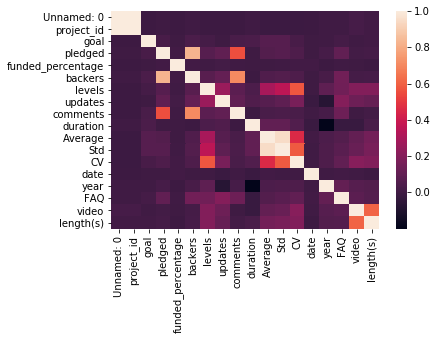

In [47]:
sns.heatmap(data.corr())

In [48]:
data.corr()

,Unnamed: 0,project_id,goal,pledged,funded_percentage,backers,levels,updates,comments,duration,Average,Std,CV,date,year,FAQ,video,length(s)
Unnamed: 0,1.000000,0.999991,-0.003841,-0.001211,-0.003401,0.004769,-0.003668,-0.003114,-0.003713,0.002365,-0.007903,-0.007729,-0.007745,-0.006326,0.001875,0.001856,0.024879,0.007617
project_id,0.999991,1.000000,-0.003821,-0.001208,-0.003421,0.004754,-0.003695,-0.003135,-0.003737,0.002372,-0.007910,-0.007736,-0.007728,-0.006331,0.001880,0.001875,0.024742,0.007514
goal,-0.003841,-0.003821,1.000000,0.025756,-0.001124,0.035442,0.016331,-0.000653,0.033333,0.034484,0.069364,0.071396,0.025955,-0.000126,0.003374,0.017135,0.003518,0.006823
pledged,-0.001211,-0.001208,0.025756,1.000000,0.009985,0.830475,0.070473,0.097058,0.558025,0.001632,0.059935,0.067891,0.048037,-0.000369,0.024344,0.104278,0.012683,0.019296
funded_percentage,-0.003401,-0.003421,-0.001124,0.009985,1.000000,0.006492,0.006043,0.014007,0.005888,0.001594,0.001638,0.004164,0.007904,0.008228,-0.004879,0.001922,-0.002604,-0.005694
backers,0.004769,0.004754,0.035442,0.830475,0.006492,1.000000,0.074951,0.109920,0.705793,-0.006320,0.053048,0.061904,0.048010,-0.001830,0.028593,0.147414,0.017501,0.023257
levels,-0.003668,-0.003695,0.016331,0.070473,0.006043,0.074951,1.000000,0.261901,0.085860,0.039893,0.301001,0.358436,0.577869,0.001471,0.091817,0.146723,0.198500,0.196025
updates,-0.003114,-0.003135,-0.000653,0.097058,0.014007,0.109920,0.261901,1.000000,0.101384,0.053063,0.069955,0.090762,0.170057,-0.014018,-0.074064,0.202318,0.137143,0.116215
comments,-0.003713,-0.003737,0.033333,0.558025,0.005888,0.705793,0.085860,0.101384,1.000000,-0.006079,0.032526,0.038549,0.033667,0.002428,0.021652,0.136974,-0.000381,0.012968
duration,0.002365,0.002372,0.034484,0.001632,0.001594,-0.006320,0.039893,0.053063,-0.006079,1.000000,0.100935,0.102060,0.057790,-0.016667,-0.199893,-0.020770,-0.019197,0.033631


In [49]:
predictors9 = ['goal']+['updates']+['levels']+['Average']+['comments']+['FAQ']+['length(s)']+['duration']+['CV']+[i for i in data6.columns if i.startswith('category')][1:]+[i for i in data6.columns if i.startswith('date')][1:]+[i for i in data6.columns if i.startswith('weekday')][1:]+[i for i in data6.columns if i.startswith('month')][1:]
X = data6[predictors9]
y = data6['status_successful']
print('X variables:\n',[i for i in X.columns])
# split the dataset into training and test sets (e.g. Use 30% of the data as test data, 70% as training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Estimate a logistic regression model on the training set with statsmodels 
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary2()

X variables:
 ['goal', 'updates', 'levels', 'Average', 'comments', 'FAQ', 'length(s)', 'duration', 'CV', 'category_Comics', 'category_Dance', 'category_Design', 'category_Fashion', 'category_Film & Video', 'category_Food', 'category_Games', 'category_Music', 'category_Photography', 'category_Publishing', 'category_Technology', 'category_Theater', 'date_2', 'date_3', 'date_4', 'date_5', 'date_6', 'date_7', 'date_8', 'date_9', 'date_10', 'date_11', 'date_12', 'date_13', 'date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19', 'date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25', 'date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                  Logit               Pseudo R-squared:   inf   
Dependent Variable:     status_successful   AIC:                inf   
Date:                   2018-12-03 02:40    BIC:                inf   
No. Observations:       28387               Log-Likelihood:     -inf  
Df Model:               67                  LL-Null:            0.0000
Df Residuals:           28319               LLR p-value:        1.0000
Converged:              1.0000              Scale:              1.0000
No. Iterations:         11.0000                                       
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
goal                  -0.0002   0.0000 -43.4502 0.0000 -0.0002 -0.0002
updates                0.3377   0.0066  51.3775 0.0000  0.3248  0.3506
levels                 0.0505   0.0061   8.3157 0.0000  0.0386  0.0624
Average                0.0002   0.0001   3.9561 0.0001  0.0001  0.0003
comments               0.2578   0.0071  36.4883 0.0000  0.2440  0.2717
FAQ                   -0.0584   0.0134  -4.3742 0.0000 -0.0846 -0.0322
length(s)              0.0004   0.0001   2.8771 0.0040  0.0001  0.0006
duration              -0.0176   0.0009 -18.7001 0.0000 -0.0194 -0.0157
CV                    -0.1546   0.0482  -3.2065 0.0013 -0.2490 -0.0601
category_Comics       -0.9741   0.1289  -7.5593 0.0000 -1.2266 -0.7215
category_Dance         1.2242   0.1275   9.5985 0.0000  0.9742  1.4741
category_Design       -0.9907   0.1109  -8.9348 0.0000 -1.2081 -0.7734
category_Fashion      -0.9097   0.1158  -7.8560 0.0000 -1.1367 -0.6827
category_Film & Video  0.2659   0.0555   4.7928 0.0000  0.1571  0.3746
category_Food         -0.1370   0.1104  -1.2407 0.2147 -0.3535  0.0794
category_Games        -2.2593   0.1454 -15.5398 0.0000 -2.5443 -1.9744
category_Music         0.5420   0.0567   9.5522 0.0000  0.4308  0.6532
category_Photography  -0.4500   0.0988  -4.5563 0.0000 -0.6435 -0.2564
category_Publishing   -0.5889   0.0694  -8.4869 0.0000 -0.7249 -0.4529
category_Technology   -1.2867   0.1829  -7.0331 0.0000 -1.6452 -0.9281
category_Theater       1.1723   0.0800  14.6480 0.0000  1.0154  1.3291
date_2                 0.0903   0.0927   0.9732 0.3305 -0.0915  0.2720
date_3                 0.1391   0.1054   1.3194 0.1870 -0.0675  0.3457
date_4                -0.0345   0.1057  -0.3264 0.7441 -0.2416  0.1726
date_5                 0.1043   0.1026   1.0158 0.3097 -0.0969  0.3055
date_6                -0.0185   0.1068  -0.1730 0.8627 -0.2278  0.1909
date_7                -0.0300   0.1052  -0.2850 0.7756 -0.2361  0.1761
date_8                -0.0445   0.1099  -0.4048 0.6856 -0.2599  0.1709
date_9                 0.0840   0.1107   0.7585 0.4481 -0.1331  0.3011
date_10               -0.0159   0.1042  -0.1528 0.8786 -0.2201  0.1883
date_11                0.0369   0.1067   0.3462 0.7292 -0.1723  0.2462
date_12                0.2234   0.1078   2.0723 0.0382  0.0121  0.4347
date_13                0.1440   0.1099   1.3103 0.1901 -0.0714  0.3594
date_14               -0.0595   0.1074  -0.5544 0.5793 -0.2700  0.1509
date_15                0.0611   0.0978   0.6240 0.5326 -0.1307  0.2528
date_16               -0.0352   0.0977  -0.3605 0.7185 -0.2268  0.1563
date_17                0.0614   0.1077   0.5704 0.5684 -0.1497  0.2725
date_18               -0.0668   0.1042  -0.6408 0.5216 -0.2710  0.1375
date_19                0.1034   0.1066   0.9696 0.3322 -0.1056  0.3124
date_20               -0.0144   0.1041  -0.1385 0.8898 -0.2185  0.1897
date_21               -0.0224   0.1037  -0.2160 0.8290 -0.2257  0.1809
date_22               -0.0667   0.1062  -0.6280 0.5300 -0.2747  0.1414
date_23                0.0851   0.1062   0.8015 0.4229 -0.1231  0.2934
dat

In [50]:
# Define the type of model
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[4529  898]
 [1198 5541]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.82771658721
Precision: 0.86053735052
Recall: 0.822228817332
F1-score: 0.840947032934
______________________________________________

